# Training machine learning models on credit card transactions labeled as fraudulent or genuine

### The dataset contains transactions made by group credit card holders in September 2013 over a span of two days. There are 284,807 transactions with only? frauds, meaning the dataset is highly unbalanced. The positive class (frauds) account for 0.173% of all transactions.

### The dataset contains numerical input variables that are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not shown. There are 28 features, namely V1, V2, ...V27, which are principal components obtained using PCA, except for the Time and Amount features. The Class feature is the response variable and it takes the value 1 in a case of fraud and 0 otherwise.

### There are two additional features, Time and Amount. The Time column signifies the time in seconds between each transaction and the first transaction, whereas the Amount column signifies how much money was transferred in this transaction. 

### Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

<h7> Shahab Athari, leading Advisor for Control and Economic Analysis in Equinor.com located in Houston, Texas.</h7> 

In [188]:
#Import Python libraries that will be used in this model
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from scipy.stats import randint as sp_randint
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import sklearn.cross_validation
import sklearn.tree
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing, decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model.stochastic_gradient import SGDClassifier
import time
import random

In [264]:
path1 = ("C:/Users/aath/Dropbox/MAEN/DS/data/Kaggle/cc/creditcard.csv")
n = sum(1 for line in open(path1)) - 1 #number of records in file (excludes header)
s = 30000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(path1, skiprows=skip)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,12,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
2,12,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
3,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0
4,23,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00,0


In [265]:
# Check the timespan of the data 
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))

Total time spanning: 2.0 days


In [266]:
# Check the percentage fraud cases
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0] * 100))

0.173 % of all transactions are fraud. 


We can see that the feature space is very imbalance and fraud cases are very rate. Becasue of this we should be very careful about our learner selection as the risk of overfitting is very high

(0, 50000)

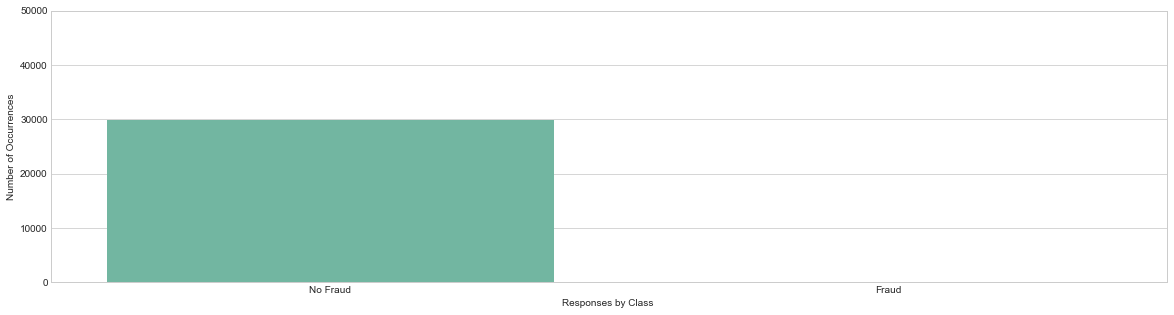

In [267]:
# To show the imbalance in first 50,000 data
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")
plt.subplot(1, 1, 1)
ax = sns.countplot(x="Class", data=df, palette="Set2")
ax.set_xlabel('Responses by Class ')
ax.set_ylabel('Number of Occurrences')
ax.set_xticklabels(['No Fraud','Fraud'], fontsize=10)
plt.ylim(0, 50000)

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is dep

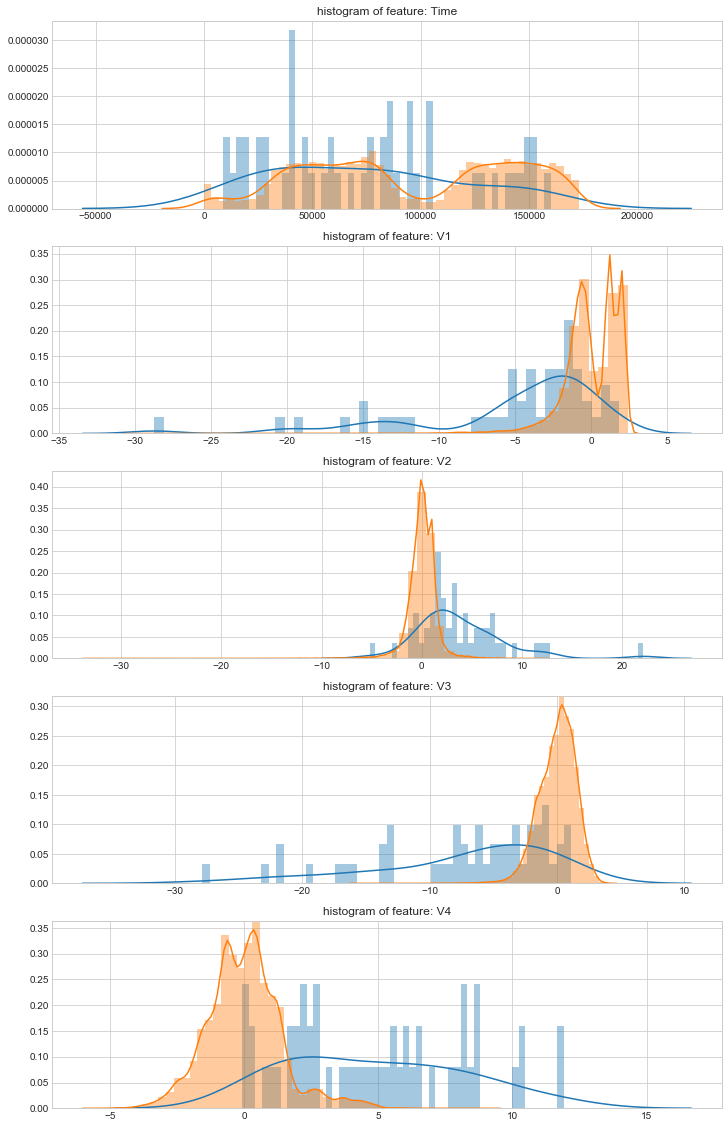

In [268]:
# let's draw the histogram for first five features:

import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, cn in enumerate(df.columns[:5]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Histograms of 5 features are highly skewed. In addition, the dataset does not have many features, so trimming the tails would lose important information. 

## Dealing with class imbalance

Class imbalance can negatively influence both the evaluatiuon of learning algorithms and also the learning process during the fitting stage. For machine learning algorithms we typically optimize a reward or cost function that is computed as a sum over the training examples that it sees during fitting. Becasue of this the decision rule is likely going to be biased towards the majority class. 

One way to address this is to assign a larger penalty to wrong predictions on the minority class. Alternatively, we can include upsampling the minority class, downsampling the majority class or generate synthetic training samples. Unfortunately, there's no universally best solution, no technique that works best across different problem domains. In this case we will use the upsampling of the Fraud case.

In [269]:
from sklearn.utils import resample

# Create a separate table for each class
df_minority = df[df.Class == 1]
df_majority = df[df.Class == 0]

# Determine the  size of minority class
minority_size = len(df[df['Class'] == 0])

# Upsample the minority case
minority_upsampled = resample(df_minority, replace=True, n_samples=minority_size, random_state=140)

# Combine in a new dataframe 'data' the majority class with the upsampled minority class
balanced_df = pd.concat([df_majority,minority_upsampled])
 
# Display new class counts
balanced_df.Class.value_counts()

1    29948
0    29948
Name: Class, dtype: int64

(0, 50000)

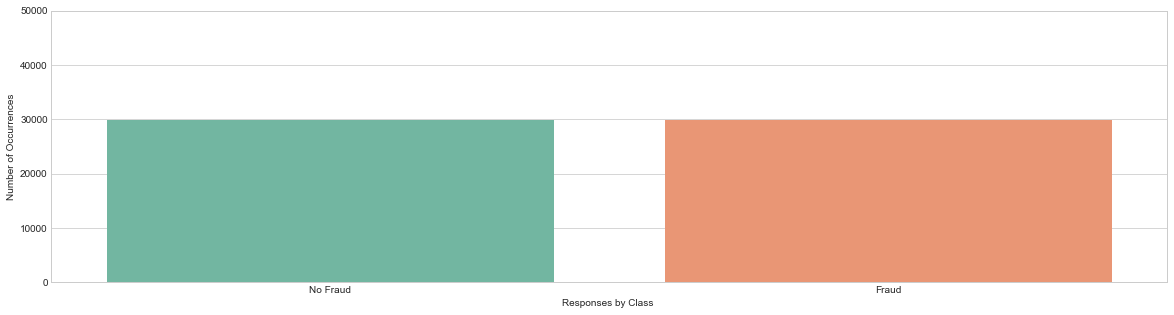

In [270]:
# To show the imbalance in first 50,000 data
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")
plt.subplot(1, 1, 1)
ax = sns.countplot(x="Class", data=balanced_df, palette="Set2")
ax.set_xlabel('Responses by Class ')
ax.set_ylabel('Number of Occurrences')
ax.set_xticklabels(['No Fraud','Fraud'], fontsize=10)
plt.ylim(0, 50000)

In [271]:
# Setup a new dataframe that contains the features per Class, dropping the time
#Drop Section & Gender
features_only = balanced_df.drop(['Time'],axis = 1)

In [272]:
#Describe the data using statistics
features_only.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,...,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000
mean,-2.598245,1.892941,-3.621586,2.463463,-1.950743,-0.592909,-3.174939,0.299157,-1.557505,-3.202589,...,-0.022506,0.179162,-0.011696,-0.051180,-0.034741,0.023317,0.112865,-0.051942,118.363630,0.500000
std,5.330855,3.794224,6.223139,3.519949,4.229272,1.776251,6.500034,5.201577,2.734929,5.003382,...,2.621290,1.128749,0.974702,0.560733,0.692351,0.489781,1.012448,0.497234,233.489645,0.500004
min,-29.973363,-33.413911,-27.855811,-5.560118,-25.772800,-21.929312,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.593642,-44.807735,-2.747197,-10.295397,-1.653193,-7.076178,-8.091375,0.000000,0.000000
25%,-3.477091,-0.236149,-5.412085,-0.073943,-2.437758,-1.574565,-3.801325,-0.233403,-2.959806,-5.112971,...,-0.246184,-0.503474,-0.299556,-0.379574,-0.346571,-0.332115,-0.087349,-0.152171,2.370000,0.000000
50%,-1.077804,0.945206,-1.191453,1.214335,-0.430818,-0.621080,-0.754412,0.159077,-0.649377,-0.825639,...,0.102081,0.090920,-0.062264,-0.000676,0.084735,0.011491,0.045962,0.017904,25.000000,0.500000
75%,0.923764,3.057250,0.372364,4.932199,0.381521,0.197727,0.297773,1.036425,0.210202,0.052245,...,0.653586,0.580787,0.179549,0.371437,0.364360,0.324638,0.476629,0.162777,99.990000,1.000000
max,2.409347,22.057729,4.101716,11.906170,32.911462,15.496962,21.914529,13.696416,10.392889,13.727347,...,22.614889,8.316275,11.360879,4.014444,3.347936,3.220178,6.507171,15.649134,6000.000000,1.000000


From above tables we reconfirmed that the distributions for each feature is highly skewed.
We also can see that scale of each feature differs and this can cause suboptimal learning especially when using classification method. Therefore, to improve the predictive accuracy, we will scale the data using a Standard Normal Distribution N(0,1):

In [273]:
names = features_only.columns
scaled_features_only = pd.DataFrame(preprocessing.scale(features_only), columns = names)

In [274]:
#Describe the data using statistics
scaled_features_only.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,...,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,5.989600e+04,59896.000000
mean,1.164859e-14,6.679772e-16,8.442572e-15,-9.516336e-15,-9.927160e-15,-7.491362e-15,-4.567743e-15,-4.634842e-17,1.137433e-14,3.225012e-14,...,4.279185e-17,-7.569871e-15,-1.763639e-17,1.594777e-15,-2.794331e-15,1.170175e-15,6.170316e-15,1.095728e-16,-1.442664e-14,0.000000
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008
min,-5.135264e+00,-9.305500e+00,-3.894245e+00,-2.279478e+00,-5.632708e+00,-1.201214e+01,-6.212682e+00,-7.948313e+00,-4.300934e+00,-4.274279e+00,...,-8.688579e+00,-7.772215e+00,-4.595909e+01,-4.808060e+00,-1.482014e+01,-3.423006e+00,-7.100716e+00,-1.616844e+01,-5.069373e-01,-1.000000
25%,-1.648615e-01,-5.611446e-01,-2.877187e-01,-7.208703e-01,-1.151545e-01,-5.526607e-01,-9.636724e-02,-1.023851e-01,-5.127421e-01,-3.818213e-01,...,-8.533199e-02,-6.047778e-01,-2.953333e-01,-5.856560e-01,-4.503969e-01,-7.257011e-01,-1.977542e-01,-2.015751e-01,-4.967869e-01,-1.000000
50%,2.852177e-01,-2.497856e-01,3.905029e-01,-3.548739e-01,3.593851e-01,-1.585996e-02,3.723900e-01,-2.693055e-02,3.320507e-01,4.750726e-01,...,4.752955e-02,-7.817710e-02,-5.188014e-02,9.006832e-02,1.725667e-01,-2.414648e-02,-6.608070e-02,1.404698e-01,-3.998653e-01,0.000000
75%,6.606894e-01,3.068663e-01,6.417957e-01,7.013612e-01,5.514621e-01,4.451188e-01,5.342651e-01,1.417405e-01,6.463500e-01,6.505322e-01,...,2.579258e-01,3.558174e-01,1.962104e-01,7.536924e-01,5.764483e-01,6.152200e-01,3.592955e-01,4.318303e-01,-7.869207e-02,1.000000
max,9.393679e-01,5.314646e+00,1.241073e+00,2.682648e+00,8.243143e+00,9.058408e+00,3.859931e+00,2.575636e+00,4.369581e+00,3.383727e+00,...,8.636047e+00,7.209029e+00,1.166784e+01,7.250610e+00,4.885822e+00,6.527175e+00,6.315744e+00,3.157709e+01,2.519035e+01,1.000000


Do we have any similarities between the features? And one way to check that is visually inspection the correlation matrix between the features

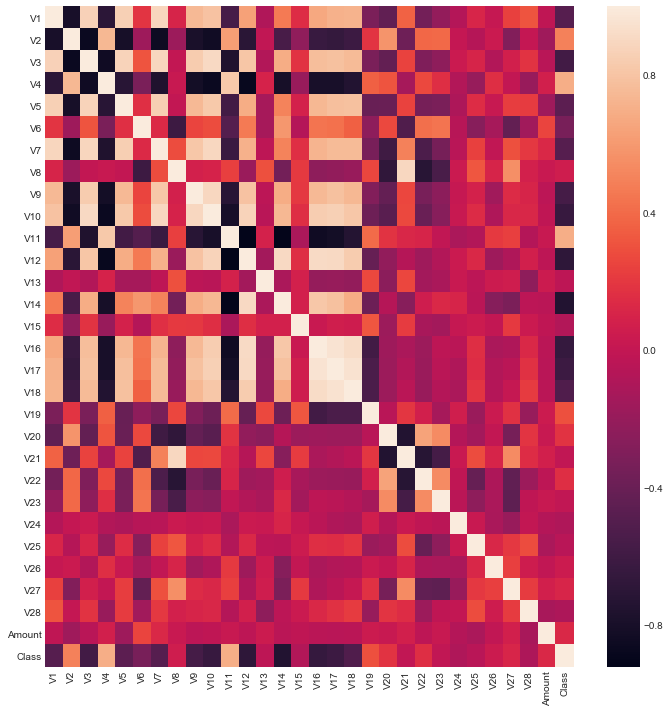

In [275]:
correlation_mat = scaled_features_only.corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_mat)  # use this if want text added to each box annot=True
plt.tight_layout()
plt.show()

Almost all of the features are not similar to one another, meaning our dataset is fairly diverse. This is yet another confirmation that we should keep all our feature space.

### Training, validation, and testing set preparation
Priot to model selection we need to split the data into training, development (i.e. validation), and test set. We are using first 80% of the data as the training and validation set. The remaining 20% will be used as the testing set:

In [276]:
TEST_RATIO = 0.20
#scaled_features_only.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * scaled_features_only.shape[0])
train_x = scaled_features_only.iloc[:TRA_INDEX, 1:-2].values
train_y = scaled_features_only.iloc[:TRA_INDEX, -1].values
test_x = scaled_features_only.iloc[TRA_INDEX:, 1:-2].values
test_y = scaled_features_only.iloc[TRA_INDEX:, -1].values

# Number of cross validation used for all models
CF_no = 10

In [200]:
scaled_features_only

TEST_RATIO = 0.20
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values
test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values

# Number of cross validation used for all models
CF_no = 10

## Logistic regression model

In [283]:
log_reg = sklearn.linear_model.LogisticRegression()
score = sklearn.cross_validation.cross_val_score(log_reg, train_x, train_y, cv=CF_no)
#print( score)

In [284]:
#Tune parameters
#C parameter
c_param = [0.01,0.1,0.5,1]

#Tune the type of penalty used between l1 and l2
penalty_type = ['l1','l2']
parameters = {'C': c_param, 'penalty': penalty_type}

#Fit parameters
log_reg_tuned = GridSearchCV(log_reg, param_grid=parameters, cv=CF_no)

#Fit the tunned classifier in the traiing space
log_reg_tuned.fit(train_x, train_y)

#Print the best parameters
print(log_reg_tuned.best_params_)    

{'C': 1, 'penalty': 'l1'}


In [285]:
# Check the prediction power of the model
pred_y = np.array(log_reg_tuned.predict(test_x))
true_y = np.array(test_y)

### Evaluating the model
Below we will use the confusion matrix which is a way of tabulating the number of misclassifications. Also, we can see the number of predicted classes which were categorized wrongly as true. But before that we need to set up a function that also plots the outcome of this matrix.

In [286]:
# A function to create confusion matrix. Part 1 of 2
# This is part 1 that can be used for all models. Part 2 depends on model specific data

import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0     0]
 [  254 11726]]


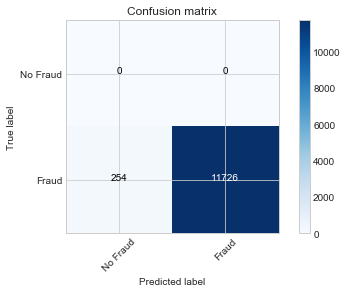

In [287]:
# A function to create confusion matrix. Part 2 of 2
class_names = ['No Fraud', 'Fraud']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

In [288]:
# Metrics computed from a confusion matrix

#cnf_matrix_metrics = metrics.confusion_matrix(test_y, pred_y)
#[row, column]
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?
# use float to perform true division, not integer division

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

True Positives (TP): We correctly predicted the fraud: 11726. 
True Negatives (TN): we correctly predicted that no fraud: 0. 
False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: 0. 
False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: 254. 


In [289]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Overall, how often is the classifier correct? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct? {}.".format(TP / float(TP + FP))) 

Overall, how often is the classifier correct? 0.9787979966611018. 
Overall, how often is the classifier incorrect? 0.021202003338898164. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 0.9787979966611018.
When the actual value is negative, how often is the prediction correct (specificity)? nan.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? nan.
When a positive value is predicted, how often is the prediction correct? 1.0.


C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [290]:
# Which metrics should you focus on?
# This is the case of fraud detection therefore we should optimize for sensitivity or recall:
# FN is in this case more important as false positives (normal transactions that are marked as possible fraud
# are more acceptable than false negatives where actual fraud has happened and we fail to detect

99.9% overall accuracy is very impressive. However, in this case where we have a very imbalanced dataset the recall or sensitivity is the most important indicator of success. 

Next, we will try a different model to see if we can improve the this accuracy.

## Decision tree

In [291]:
D_tree = DecisionTreeClassifier(random_state=37)
params = {"max_depth": [2, 5, 10, 15], "min_samples_leaf": sp_randint(1, 5), 
          "criterion": ["gini", "entropy"]}

D_tree_tuned = RandomizedSearchCV(D_tree, params)
D_tree_tuned.fit(train_x,train_y)

#Print the best parameters
print(D_tree_tuned.best_params_)  

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4}


In [292]:
# Check the prediction power of the model
pred_y = np.array(D_tree_tuned.predict(test_x))
true_y = np.array(test_y)

Confusion matrix, without normalization
[[11980]]


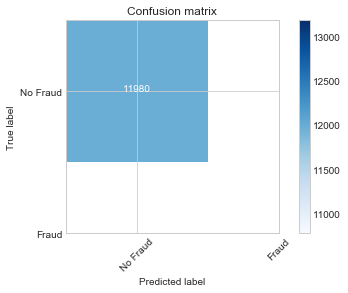

In [293]:
class_names = ['No Fraud', 'Fraud']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [295]:
# Metrics computed from a confusion matrix

# save confusion matrix and slice into four pieces
cnf_matrix_metrics = metrics.confusion_matrix(test_y, pred_y)

#[row, column]
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?
# use float to perform true division, not integer division

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [296]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Overall, how often is the classifier correct? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct? {}.".format(TP / float(TP + FP))) 

Overall, how often is the classifier correct? 0.9787979966611018. 
Overall, how often is the classifier incorrect? 0.021202003338898164. 
When the actual value is positive, how often is the prediction correct (sensitivity or recall)? 0.9787979966611018.
When the actual value is negative, how often is the prediction correct (specificity)? nan.
When the actual value is negative, how often is the prediction incorrect (false positive rate)? nan.
When a positive value is predicted, how often is the prediction correct? 1.0.


C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [297]:
# Which metrics should you focus on?
# This is the case of fraud detection therefore we should optimize for sensitivity or recall:
# FN is in this case more important as false positives (normal transactions that are marked as possible fraud
# are more acceptable than false negatives where actual fraud has happened and we fail to detect

Try another model

## Naive Bayes Classifier

In [298]:
# Prepare dataframe tables
X1 = scaled_features_only.iloc[:, 1:-2].values
y1 = scaled_features_only.iloc[:, -1].values

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

n_samples = 19960
n_bins = 2  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                   centers=centers, shuffle=False, random_state=42)
y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# # split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X1, y1, sample_weight, test_size=0.8, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [59896, 59896, 19960]

In [236]:
X_train = scaled_features_only.iloc[:TRA_INDEX, 1:-2].values
y_train = df.iloc[:TRA_INDEX, -1].values
X_test = df.iloc[TRA_INDEX:, 1:-2].values
y_test = df.iloc[TRA_INDEX:, -1].values

array([[-0.24,  0.54, -0.8 , ...,  1.54, -0.05,  0.02],
       [ 0.01, -0.62,  0.82, ..., -0.07,  0.76,  0.34],
       [-0.61,  0.5 , -0.23, ...,  4.75, -0.1 , -0.01],
       ...,
       [-0.16,  0.2 , -1.4 , ...,  0.18,  0.34,  0.51],
       [-0.08,  0.66, -0.75, ...,  0.66, -0.04,  0.01],
       [-0.27,  0.45, -0.41, ..., -0.4 ,  0.08,  0.14]])

In this classification exercise we are also interested in the associated probabilities. These probabilities give us a some kind of confidence on the prediction. However, not all classifiers provide well-calibrated probabilities, some being over-confident while others being under-confident. Thus, a separate calibration of predicted probabilities is often desirable as a postprocessing. Below we use different calibration methods to evaluate the quality of the returned probabilities using Brier’s score.

In [303]:
# Use the Brier score which measures the accuracy of probabilistic predictions. 
# It is applicable to tasks in which predictions must assign probabilities to a set of mutually 
# exclusive discrete outcomes.”
# This function returns a score of the mean square difference between 
# the actual outcome and the predicted probability of the possible outcome. 
# The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual 
# outcome can be a value between 0 and 1.

# The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), 
# the more accurate the prediction is. 
# It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.

# Gaussian Naive-Bayes with no calibration
clf = GaussianNB()
clf.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=CF_no, method='isotonic')
clf_isotonic.fit(X_train, y_train, sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=CF_no, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf, sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic, sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid, sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)

Brier scores: (the smaller the better)
No calibration: 0.133
With isotonic calibration: 0.099
With sigmoid calibration: 0.109


Based on Brier scores isotoic calibration is working best and we can also illustrate the same conclusion using below plots.

Below compares the estimated probability using a Gaussian naive Bayes classifier without calibration, with a sigmoid calibration, and with a non-parametric isotonic calibration. One can observe that only the non-parametric model is able to provide a probability calibration that returns probabilities close to the expected 0.5 for most of the samples belonging to the middle cluster with heterogeneous labels in the second figure. The second figure alibration. 

First we create the dataset with 2 classes and 3 blobs of data. The blob in the middle contains random samples of each class. Therefore, the probability for the samples in this blob should be 0.5. And later we will see which calibration method represent this middle blob more accurately. This is same has having the lowest Brier score.

Text(0.5,1,'Data')

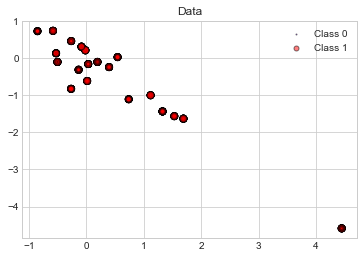

In [304]:
# The dataset is plotted below as 3 blobs of data where the middle contains a random sample of each class hence should
# have the probability of 50%

plt.figure()
y_unique = np.unique(y)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X_train[y_train == this_y]
    this_sw = sw_train[y_train == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50, c=color,
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")

Next, we show the data above with estimated probability using a Gaussian naive Bayes classifier without calibration, with a sigmoid calibration and with a non-parametric isotonic calibration. One can observe that the non-parametric model provides the most accurate probability estimates for samples in the middle, i.e., 0.5.

ValueError: cannot reshape array of size 15968 into shape (25,newaxis)

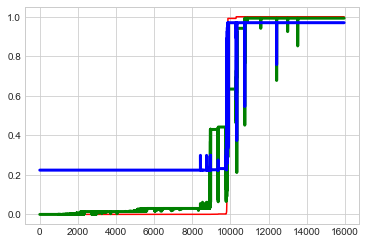

In [305]:
# Plot the predicted probabilities
plt.figure()
order = np.lexsort((prob_pos_clf, ))
plt.plot(prob_pos_clf[order], 'r', label='No calibration (%1.3f)' % clf_score)

plt.plot(prob_pos_isotonic[order], 'g', linewidth=3,
         label='Isotonic calibration (%1.3f)' % clf_isotonic_score)

plt.plot(prob_pos_sigmoid[order], 'b', linewidth=3,
         label='Sigmoid calibration (%1.3f)' % clf_sigmoid_score)

plt.plot(np.linspace(0, y_test.size, 51)[1::2], y_test[order].reshape(25, -1).mean(1),
         'k', linewidth=3, label=r'Empirical')

plt.ylim([-0.05, 1.05])
plt.xlabel("Instances sorted according to predicted probability "
           "(uncalibrated GNB)")
plt.ylabel("P(y=1)")
plt.legend(loc="upper left")
plt.title("Gaussian naive Bayes probabilities")

plt.show()

Below we continue using Naive Bayes caliberated with isotonic method. 

In [306]:
# We see isotonic calibration is performing best and below we run model evaluation on this version of Naive Bayes

y_pred_test = clf_sigmoid.predict(X_test)

#Print the time required to fit and evaluate the model
start_time = time.time()
print("Computational efforts: %s seconds ---" % (time.time() - start_time))

clf_isotonic_accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
clf_isotonic_precision = precision_score(y_pred=y_pred_test, y_true=y_test)
clf_isotonic_recall = recall_score(y_pred=y_pred_test, y_true=y_test)

print("Accuracy: {}. ".format(clf_isotonic_accuracy))
print("Precision: {}. ".format(clf_isotonic_precision))
print("Recall: {}. ".format(clf_isotonic_recall))

Computational efforts: 0.0 seconds ---
Accuracy: 0.8642910821643287. 
Precision: 0.9706601466992665. 
Recall: 0.7498111306975573. 


Confusion matrix, without normalization
[[7846  180]
 [1987 5955]]


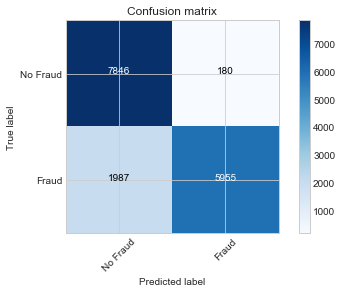

In [307]:
#Confusion matrix

cnf_matrix = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

So far, Naive Bayes performs worst among the models and because of the nature of this business the performance of this model is not acceptable.

## KNeighbors Classifier

In [308]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape,

((47916, 27), (47916,), (11980, 27), (11980,))

In [ ]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.metrics import confusion_matrix, average_precision_score

KNN = KNeighborsClassifier()  #initialize the KNN classifier

#Create range of values to fit parameters
neighbors = [3,5,7]
weight_sys = ['distance','uniform']
parameters = {'n_neighbors': neighbors, 'weights': weight_sys}

#Fit parameters using gridsearch
clf = GridSearchCV(KNN, param_grid=parameters, cv=CF_no)

#Fit the tunned model on the training set
clf.fit(train_x,train_y)

#Print the best hyperparameters set
print("Best Hyper Parameters:", clf.best_params_)

In [226]:
pred_y = classifier.predict(test_x) #generate predictions from the features of the test set
print('completed predictions')

NameError: name 'classifier' is not defined

In [ ]:
#Initialize the model on test dataset
clf.fit(test_x, test_y)

# Predict on test dataset
y_pred = clf.predict(test_x)

# Check the prediction power of the model
pred_y = np.array(clf.predict(test_x))
true_y = np.array(test_y)

In [ ]:
class_names = ['No Fraud', 'Fraud']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [ ]:
# Metrics computed from a confusion matrix

# save confusion matrix and slice into four pieces
cnf_matrix_metrics = metrics.confusion_matrix(test_y, y_pred)

#[row, column]
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?
# use float to perform true division, not integer division

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

In [ ]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Overall, how often is the classifier correct? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct? {}.".format(TP / float(TP + FP))) 

In [ ]:
# Which metrics should you focus on?
# This is the case of fraud detection therefore we should optimize for sensitivity or recall:
# FN is in this case more important as false positives (normal transactions that are marked as possible fraud
# are more acceptable than false negatives where actual fraud has happened and we fail to detect

To avoid risk of overfitting

## Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

# Initialize and fit the model
svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

#Fit parameters using gridsearch
svc_tuned = GridSearchCV(svc, parameters, cv=CF_no)

#Fit the model on the training set
svc_tuned.fit(train_x, train_y)

In [ ]:
# Predict on test dataset
y_pred = svc_tuned.predict(test_x)

# Check the prediction power of the model
pred_y = np.array(svc_tuned.predict(test_x))
true_y = np.array(test_y)

In [ ]:
class_names = ['No Fraud', 'Fraud']
np.set_printoptions(precision=2)

cnf_matrix = confusion_matrix(true_y, pred_y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix')
plt.show()

In [ ]:
# Metrics computed from a confusion matrix

# save confusion matrix and slice into four pieces
cnf_matrix_metrics = metrics.confusion_matrix(test_y, y_pred)

#[row, column]
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?
# use float to perform true division, not integer division

print("True Positives (TP): We correctly predicted the fraud: {}. ".format(TP))
print("True Negatives (TN): we correctly predicted that no fraud: {}. ".format(TN))
print("False Positives (FP): we incorrectly predicted that it is a fraud or Type I error: {}. ".format(FP))
print("False Negatives (FN): we incorrectly predicted that it is not a fraud or Type II error: {}. ".format(FN))

In [ ]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Overall, how often is the classifier correct? {}. ".format((TP + TN) / float(TP + TN + FP + FN)))      
print("Overall, how often is the classifier incorrect? {}. ".format((FP + FN) / float(TP + TN + FP + FN))) 
print("When the actual value is positive, how often is the prediction correct (sensitivity or recall)? {}.".format(TP / float(FN + TP))) 
print("When the actual value is negative, how often is the prediction correct (specificity)? {}.".format(TN / (TN + FP))) 
print("When the actual value is negative, how often is the prediction incorrect (false positive rate)? {}.".format(FP / float(TN + FP))) 
print("When a positive value is predicted, how often is the prediction correct? {}.".format(TP / float(TP + FP))) 

Gradient Boosting Classifier